# 농산물 가격 및 기상 데이터 분석 및 시각화

## 1. 라이브러리 임포트

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # 스케일링을 위해 추가

import matplotlib.font_manager as fm
import matplotlib

font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

## 2. 데이터 로드 및 초기 탐색

In [127]:
# 파일 경로
price_file = '/Users/woojin/Desktop/SK Networks Family AI Camp_17/EDA_MINI_2TEAM/sehee/data/region_price.xlsx'
weather_file = '/Users/woojin/Desktop/SK Networks Family AI Camp_17/EDA_MINI_2TEAM/sehee/data/region_weather.csv'
cold_file = '/Users/woojin/Desktop/SK Networks Family AI Camp_17/EDA_MINI_2TEAM/sehee/data/mon_cold.xlsx'
hot_file = '/Users/woojin/Desktop/SK Networks Family AI Camp_17/EDA_MINI_2TEAM/sehee/data/mon_hot.xlsx'
wind_file = '/Users/woojin/Desktop/SK Networks Family AI Camp_17/EDA_MINI_2TEAM/sehee/data/mon_wind.xlsx'
export_import_file = '/Users/woojin/Desktop/SK Networks Family AI Camp_17/EDA_MINI_2TEAM/sehee/data/spinach_cucumber_df.xlsx'

# 데이터 로드
df_price = pd.read_excel(price_file)
df_weather = pd.read_csv(weather_file)
df_cold = pd.read_excel(cold_file)
df_hot = pd.read_excel(hot_file)
df_wind = pd.read_excel(wind_file)
ex_import_df = pd.read_excel(export_import_file)


# 각 데이터프레임 확인
print("\n--- 가격 데이터 (df_price) ---")
print(df_price.head(2))
print("\n--- 날씨 데이터 (df_weather) ---")
print(df_weather.head(2))
print("\n--- 한파 데이터 (df_cold) ---")
print(df_cold.head(2))
print("\n--- 폭염 데이터 (df_hot) ---")
print(df_hot.head(2))
print("\n--- 태풍 데이터 (df_wind) ---")
print(df_wind.head(2))


--- 가격 데이터 (df_price) ---
    지역       날짜  품목          평균가격      총거래물량
0  강원도  2021-01  감자  24245.289659  3012880.0
1  경기도  2021-01  감자  24006.188904   356360.0

--- 날씨 데이터 (df_weather) ---
    지역       날짜  평균기온(°C)  월합강수량(00~24h만)(mm)  평균풍속(m/s)  최심적설(cm)
0  강원도  2019-01 -1.857143            4.678571   1.714286      17.1
1  강원도  2019-02  0.585714           22.928571   1.614286      17.1

--- 한파 데이터 (df_cold) ---
    지역  2020-11  2020-12  2021-01  2021-02  2021-03  2021-04  2021-11  \
0  경기도        0        1        1        0        0        0        0   
1  강원도        0        1        1        1        0        0        0   

   2021-12  2022-01  ...  2023-12  2024-01  2024-02  2024-03  2024-04  \
0        1        1  ...        1        1        0        0        0   
1        1        1  ...        1        1        0        0        0   

   2024-11  2024-12  2025-01  2025-02  2025-03  
0        0        0        1        1        0  
1        0        1        1        1       

## 3. 데이터 전처리

In [128]:
# 날짜 컬럼을 datetime 형식으로 변환
df_price["날짜"] = pd.to_datetime(df_price["날짜"])
df_weather["날짜"] = pd.to_datetime(df_weather["날짜"])

# 가격 데이터의 "평균가격"과 "총거래물량" 컬럼을 숫자형으로 변환
df_price["평균가격"] = pd.to_numeric(df_price["평균가격"], errors="coerce")
df_price["총거래물량"] = pd.to_numeric(df_price["총거래물량"], errors="coerce")

# 날씨 데이터 컬럼명 정리
weather_cols = ["지역", "날짜", "평균기온(°C)", "월합강수량(00~24h만)(mm)", "평균풍속(m/s)", "최심적설(cm)"]

def preprocess_event_df(df, event_name):
    # 첫 번째 컬럼을 "지역"으로 설정하고 나머지 컬럼은 날짜로 간주
    df_melted = df.melt(id_vars=[df.columns[0]], var_name="날짜", value_name=f"{event_name}_발생")
    df_melted.rename(columns={df.columns[0]: "지역"}, inplace=True)
    # YYYY-MM 형식의 날짜를 datetime으로 변환 후 월 단위로 통일
    df_melted["날짜"] = pd.to_datetime(df_melted["날짜"], format="%Y-%m").dt.strftime('%Y-%m')
    df_melted["날짜"] = df_melted["날짜"]
    return df_melted

df_cold_processed = preprocess_event_df(df_cold, "한파")
df_hot_processed = preprocess_event_df(df_hot, "폭염")
df_wind_processed = preprocess_event_df(df_wind, "태풍")

print("\n--- 전처리된 한파 데이터 (df_cold_processed) ---")
print(df_cold_processed.head())
print("\n--- 전처리된 폭염 데이터 (df_hot_processed) ---")
print(df_hot_processed.head())
print("\n--- 전처리된 태풍 데이터 (df_wind_processed) ---")
print(df_wind_processed.head())


--- 전처리된 한파 데이터 (df_cold_processed) ---
     지역       날짜  한파_발생
0   경기도  2020-11      0
1   강원도  2020-11      0
2  전라남도  2020-11      0
3  경상남도  2020-11      0
4  경상북도  2020-11      0

--- 전처리된 폭염 데이터 (df_hot_processed) ---
     지역       날짜  폭염_발생
0   경기도  2020-06      1
1   강원도  2020-06      1
2  전라남도  2020-06      1
3  경상남도  2020-06      1
4  경상북도  2020-06      1

--- 전처리된 태풍 데이터 (df_wind_processed) ---
        지역       날짜  태풍_발생
0  제주특별자치도  2020-08      1
1      강원도  2020-08      1
2     전라남도  2020-08      1
3     경상남도  2020-08      1
4    광주광역시  2020-08      1


## 4. 가격 및 날씨 데이터 통합

In [129]:
# 날짜 월 단위 통일
df_weather["날짜"] = df_weather["날짜"].dt.strftime('%Y-%m')

# 날짜 월 단위 통일
df_price["날짜"] = df_price["날짜"].dt.strftime('%Y-%m')

# 가격 데이터와 날씨 데이터를 병합
merged_df = pd.merge(df_price, df_weather, left_on=["지역", "날짜"], right_on=["지역", "날짜"], how="left")

# 이벤트 데이터 병합
merged_df = pd.merge(merged_df, df_cold_processed, on=["지역", "날짜"], how="left")
merged_df = pd.merge(merged_df, df_hot_processed, on=["지역", "날짜"], how="left")
merged_df = pd.merge(merged_df, df_wind_processed, on=["지역", "날짜"], how="left")

# 최심적설, 한파, 폭염, 태풍의 NaN 값은 0으로 fill
merged_df["최심적설(cm)"] = merged_df["최심적설(cm)"].fillna(0)
merged_df["한파_발생"] = merged_df["한파_발생"].fillna(0)
merged_df["폭염_발생"] = merged_df["폭염_발생"].fillna(0)
merged_df["태풍_발생"] = merged_df["태풍_발생"].fillna(0)

# 숫자형 재변환하고, 변환할 수 없는 행 제거
numeric_cols = ["평균가격", "총거래물량", "평균기온(°C)", "월합강수량(00~24h만)(mm)", "평균풍속(m/s)", "최심적설(cm)"]
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")
merged_df.dropna(subset=numeric_cols, inplace=True)

# 시금치, 오이에 대한 수출입물량 컬럼 추가
mini_df = merged_df[merged_df['품목'].isin(['시금치', '오이'])]
add_date = pd.merge(mini_df, ex_import_df, on=['날짜', '품목'], how='left')

print("병합된 데이터")
add_date

병합된 데이터


,지역,날짜,품목,평균가격,총거래물량,평균기온(°C),월합강수량(00~24h만)(mm),평균풍속(m/s),최심적설(cm),한파_발생,폭염_발생,태풍_발생,수입중량,수출중량
0,충청남도,2021-01,시금치,9416.547182,527596.0,-1.766667,26.550000,1.400000,10.1,1.0,0.0,0.0,134130.0,670.90
1,경기도,2021-01,시금치,10568.102445,392952.8,-3.680000,18.460000,1.440000,9.4,1.0,0.0,0.0,134130.0,670.90
2,전라남도,2021-01,시금치,9403.908173,215764.0,1.907692,32.761538,2.707692,18.7,1.0,0.0,0.0,134130.0,670.90
3,충청북도,2021-01,시금치,10448.173149,125308.0,-3.175000,16.075000,1.275000,6.3,1.0,0.0,0.0,134130.0,670.90
4,광주광역시,2021-01,시금치,8896.794642,60096.0,1.400000,33.000000,1.500000,11.8,1.0,0.0,0.0,134130.0,670.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,대구광역시,2025-06,오이,13807.895585,53950.0,24.800000,163.700000,1.800000,0.0,0.0,1.0,0.0,1513866.6,13095.39
1612,부산광역시,2025-06,오이,18835.189363,49690.0,22.750000,260.500000,2.650000,0.0,0.0,0.0,0.0,1513866.6,13095.39
1613,서울특별시,2025-06,오이,15877.713066,67020.0,24.000000,98.100000,2.300000,0.0,0.0,0.0,0.0,1513866.6,13095.39
1614,울산광역시,2025-06,오이,11747.845655,6050.0,23.200000,163.100000,1.700000,0.0,0.0,0.0,0.0,1513866.6,13095.39


## 5. 이상치 탐지 및 제거 (평균가격, 총거래물량)

In [130]:
def remove_outliers_iqr(df, column):
    # 결측값은 먼저 제거
    df = df[df[column].notna()]

    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_check = ["평균가격", "총거래물량"]
original_rows = len(add_date)

# 1. 결측값 제거 후 이상치 제거
if "평균가격" in add_date.columns:
    add_date = add_date[add_date["평균가격"].notna()]
    add_date = remove_outliers_iqr(add_date, "평균가격")
    print(f"컬럼 평균가격에서 이상치 제거 후 데이터 크기: {len(add_date)}")

# 2. 결측값 평균으로 대체
if "총거래물량" in add_date.columns:
    mean_value = add_date["총거래물량"].mean()
    add_date["총거래물량"].fillna(mean_value, inplace=True)

print(f"\n총 {original_rows - len(add_date)}개 행 제거")
add_date.describe()

컬럼 평균가격에서 이상치 제거 후 데이터 크기: 1616

총 0개 행 제거


/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/1871925706.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  add_date["총거래물량"].fillna(mean_value, inplace=True)


,평균가격,총거래물량,평균기온(°C),월합강수량(00~24h만)(mm),평균풍속(m/s),최심적설(cm),한파_발생,폭염_발생,태풍_발생,수입중량,수출중량
count,1616.000000,1.616000e+03,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1.616000e+03,1616.000000
mean,19384.284808,2.040110e+05,13.543440,109.283662,1.944979,1.573267,0.103960,0.217822,0.112005,9.598275e+05,7374.327376
std,11319.835060,3.999277e+05,9.237562,115.052278,0.631677,4.833266,0.305304,0.412893,0.315470,7.081669e+05,13960.860232
min,1300.000000,4.000000e+00,-4.600000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,5.970000e+04,12.000000
25%,10323.701683,9.338000e+03,5.826786,31.100000,1.435714,0.000000,0.000000,0.000000,0.000000,2.561200e+05,412.500000
50%,16284.305970,3.993600e+04,14.360714,80.200000,1.800000,0.000000,0.000000,0.000000,0.000000,1.174982e+06,3630.150000
75%,26046.780174,1.704675e+05,22.353846,141.357143,2.400000,0.000000,0.000000,0.000000,0.000000,1.606030e+06,11308.650000
max,70170.009341,2.942760e+06,29.300000,776.300000,4.300000,50.600000,1.000000,1.000000,1.000000,2.213432e+06,130380.900000


## 6. 스케일링

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['평균가격', '총거래물량', '평균기온(°C)', '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '최심적설(cm)', '수입중량', '수출중량']

add_date[num_cols] = scaler.fit_transform(add_date[num_cols])
add_date.head()

,지역,날짜,품목,평균가격,총거래물량,평균기온(°C),월합강수량(00~24h만)(mm),평균풍속(m/s),최심적설(cm),한파_발생,폭염_발생,태풍_발생,수입중량,수출중량
0,충청남도,2021-01,시금치,-0.880828,0.809359,-1.657888,-0.719319,-0.863017,1.764722,1.0,0.0,0.0,-1.166325,-0.480307
1,경기도,2021-01,시금치,-0.779067,0.472586,-1.865078,-0.789656,-0.799673,1.619848,1.0,0.0,0.0,-1.166325,-0.480307
2,전라남도,2021-01,시금치,-0.881944,0.029397,-1.260002,-0.665313,1.207817,3.544608,1.0,0.0,0.0,-1.166325,-0.480307
3,충청북도,2021-01,시금치,-0.789665,-0.196854,-1.810393,-0.810393,-1.060964,0.978261,1.0,0.0,0.0,-1.166325,-0.480307
4,광주광역시,2021-01,시금치,-0.926757,-0.359964,-1.314979,-0.663240,-0.704659,2.116560,1.0,0.0,0.0,-1.166325,-0.480307


/opt/anaconda3/envs/ml_env/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.draw()
/opt/anaconda3/envs/ml_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


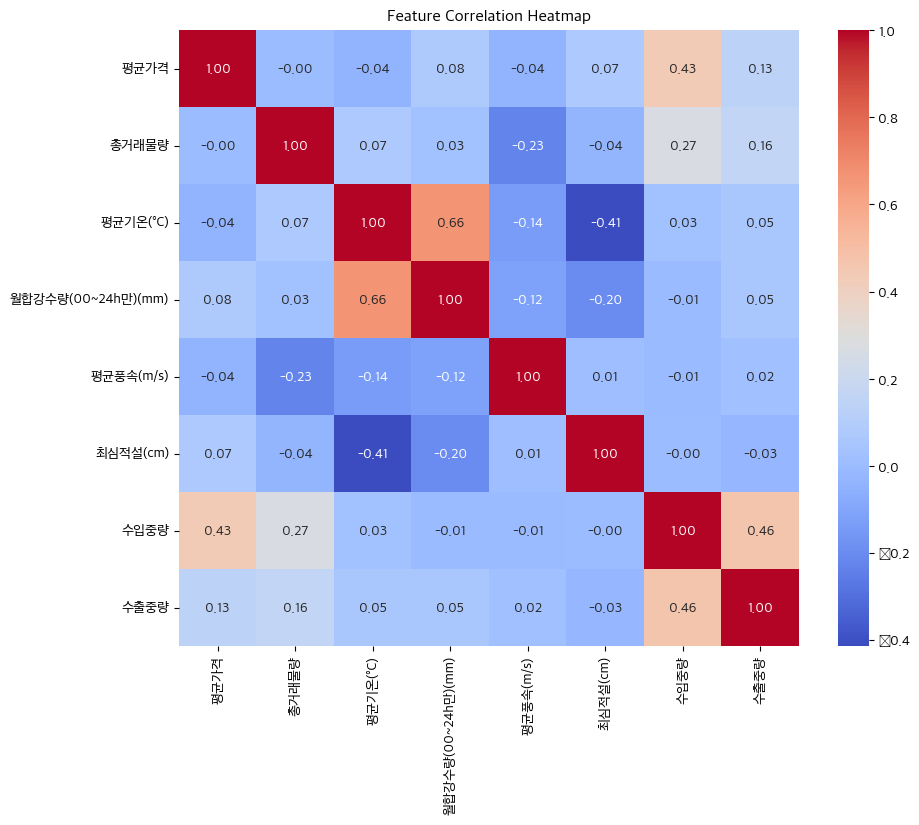

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

corr = add_date[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 시금치/오이 파일 분류

In [133]:
add_date_spinach = add_date[add_date['품목'] == '시금치'].copy()
add_date_cucumber = add_date[add_date['품목'] == '오이'].copy()

add_date_spinach.to_excel('/Users/woojin/Desktop/SK Networks Family AI Camp_17/EDA_MINI_2TEAM/sehee/data/add_data_spinach.xlsx', index=False)
add_date_cucumber.to_excel('/Users/woojin/Desktop/SK Networks Family AI Camp_17/EDA_MINI_2TEAM/sehee/data/add_data_cucumber.xlsx', index=False)

# XGBoost

In [134]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['총거래']

X = add_date_spinach.drop(['평균가격', '날짜'], axis=1)
y = add_date_spinach['평균가격']

X = pd.get_dummies(X, columns=['지역', '품목'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

xgb_reg = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=0
)

xgb_reg.fit(X_train, y_train)

y_pred_train = xgb_reg.predict(X_train)
y_pred_test = xgb_reg.predict(X_test)

print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

print(r2_score(y_test, y_pred_test))
print(r2_score(y_test, y_pred_test))

0.04720630758606983
0.10615463732546847
0.8901446392709335
0.8901446392709335


In [135]:
from sklearn.model_selection import GridSearchCV
import numpy as np

xgb_reg = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], # 트리의 개수
    'max_depth': [3, 5, 7, 9, 12],         # 트리의 최대 깊이
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5], # 학습률
    'subsample': [0.7, 0.8, 0.9, 1.0],   # 각 트리를 학습할 때 사용할 데이터 샘플 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0] # 각 트리를 학습할 때 사용할 피처(컬럼) 비율
    # 'gamma': [0, 0.1, 0.2] # 추가적으로 감마 값도 탐색할 수 있습니다.
}

grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # 회귀 문제에 적합한 평가 지표 (음수 MSE)
    cv=5, # 5-겹 교차 검증
    n_jobs=-1, # 사용 가능한 모든 CPU 코어 사용
    verbose=2 # 학습 과정 출력
)

grid_search.fit(X_train, y_train)

print(f"\n--- GridSearchCV 결과 ---")
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
# GridSearchCV의 best_score_는 'scoring' 파라미터에 따라 값이 달라집니다.
# 'neg_mean_squared_error'를 사용했으므로, 이 값에 -1을 곱해야 실제 MSE가 됩니다.
print(f"교차 검증 최고 점수 (음수 MSE): {grid_search.best_score_:.4f}")
print(f"교차 검증 최고 MSE: {-grid_search.best_score_:.4f}")

# --- 7. 최적의 모델로 예측 및 성능 평가 ---
best_xgb_reg = grid_search.best_estimator_ # GridSearchCV가 찾아낸 최적의 모델

y_pred_test_tuned = best_xgb_reg.predict(X_test)

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_tuned))
r2_tuned = r2_score(y_test, y_pred_test_tuned)

print(f"\n--- 최적화된 XGBoost 모델 테스트 세트 성능 ---")
print(f"RMSE: {rmse_tuned:.4f}")
print(f"R-squared: {r2_tuned:.4f}")

# --- 8. 최적 모델의 피처 중요도 확인 ---
feature_importances_tuned = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb_reg.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\n--- 최적화된 모델의 피처 중요도 (상위 10개) ---")
print(feature_importances_tuned.head(10))

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] E

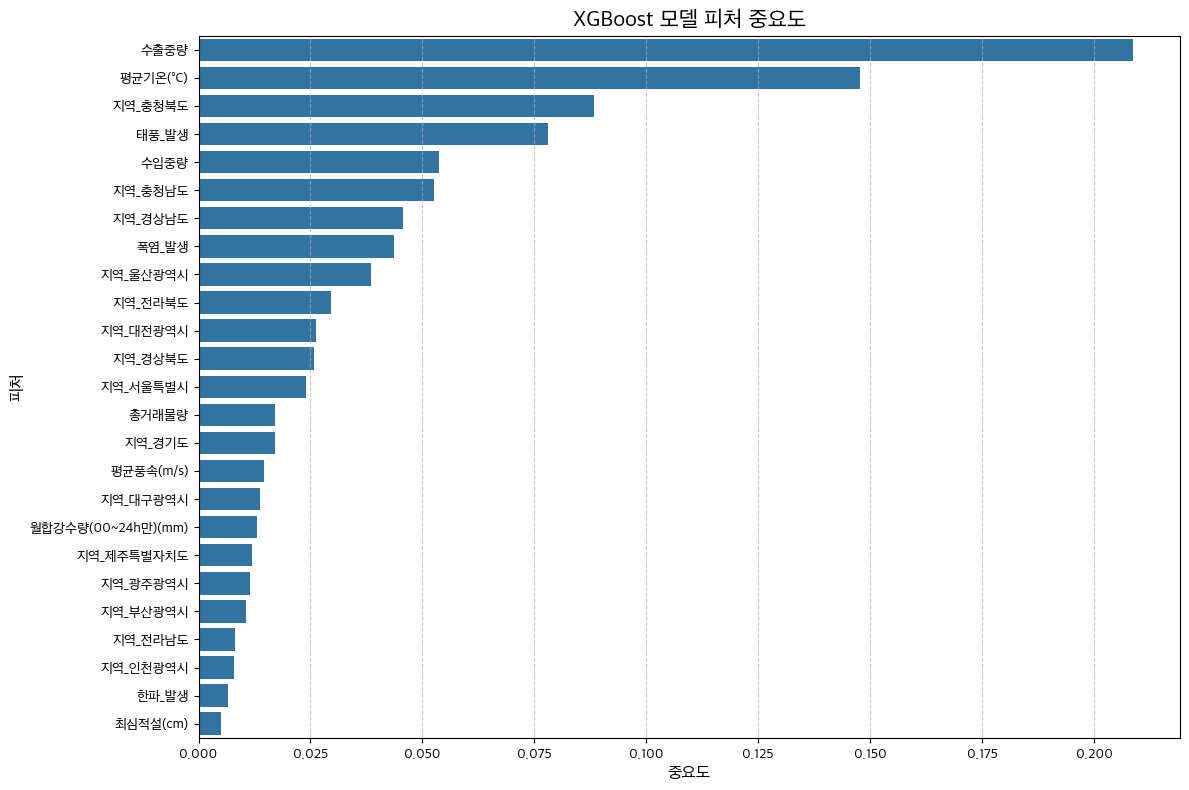

In [137]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_tuned)
plt.title('XGBoost 모델 피처 중요도', fontsize=16)
plt.xlabel('중요도', fontsize=12)
plt.ylabel('피처', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.savefig('feature_importance_barplot.png') # 이미지 파일로 저장
plt.show()

/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:13: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.savefig('actual_vs_predicted_spinach.png') # 이미지 저장
/opt/anaconda3/envs/ml_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


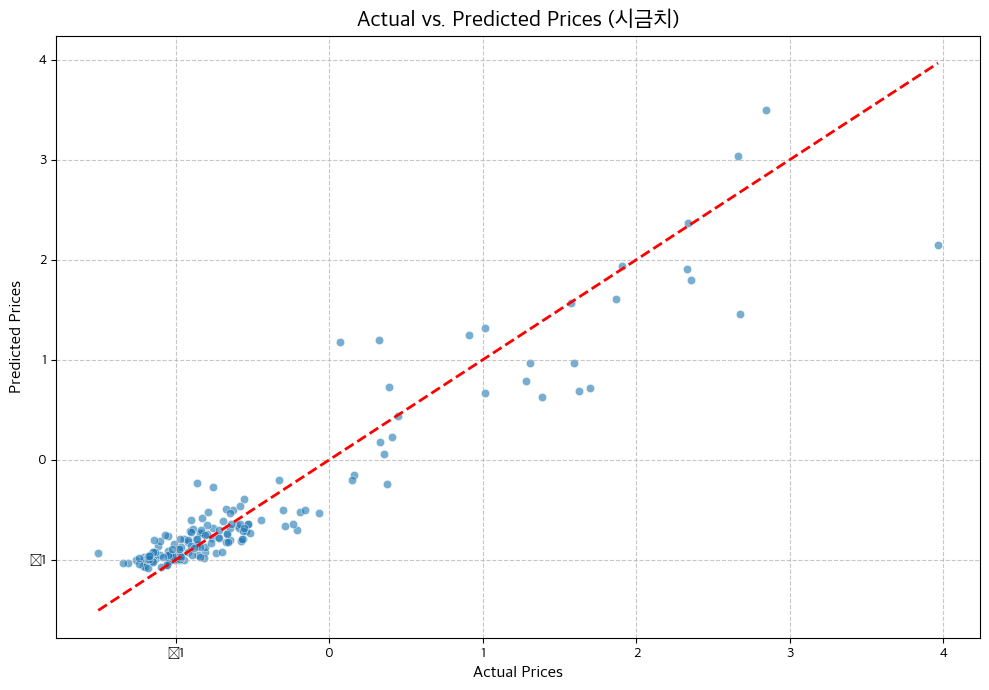

/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.savefig('residuals_histogram_spinach.png') # 이미지 저장
/opt/anaconda3/envs/ml_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


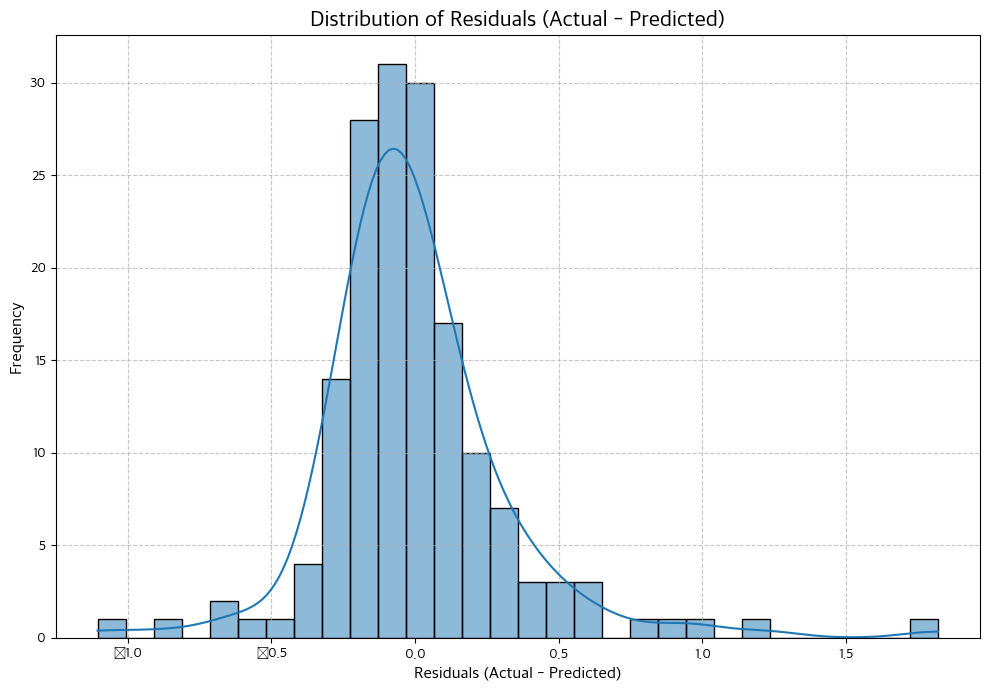

/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:37: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.savefig('residuals_vs_predicted_spinach.png') # 이미지 저장
/opt/anaconda3/envs/ml_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


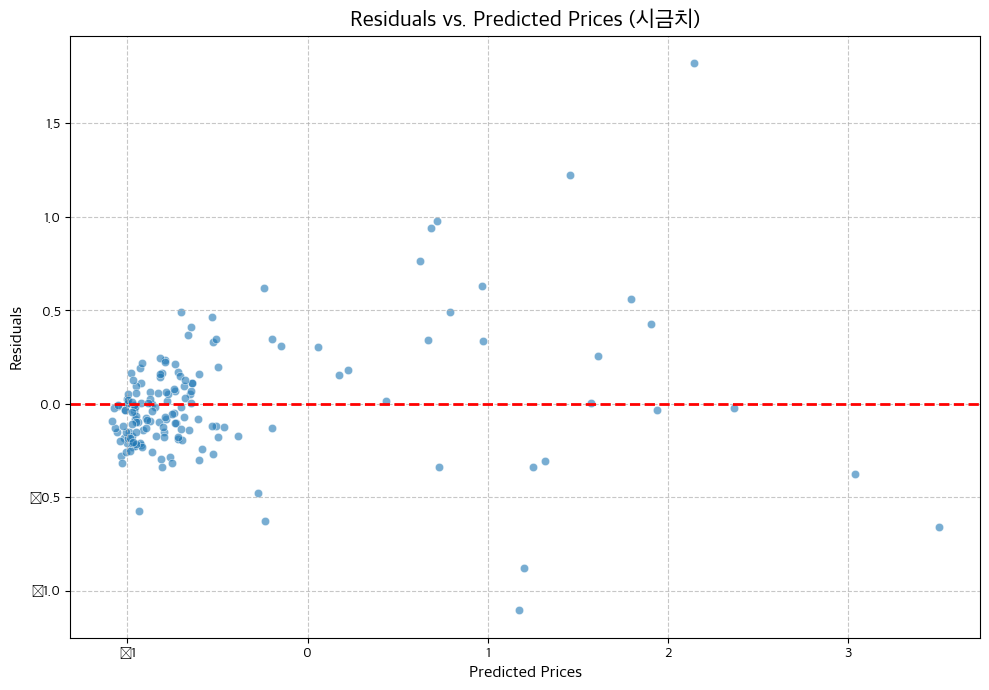

In [138]:
# --- 모델 성능 시각화 ---

# 1. 실제값 vs. 예측값 산점도(Scatter Plot)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
# 완벽한 예측을 나타내는 y=x 선 추가
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Prices (시금치)', fontsize=16)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('actual_vs_predicted_spinach.png') # 이미지 저장
plt.show()

# 2. 잔차(Residual) 히스토그램
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals (Actual - Predicted)', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('residuals_histogram_spinach.png') # 이미지 저장
plt.show()

# 3. 잔차와 예측값의 산점도
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.6)
# 잔차가 0인 이상적인 경우를 나타내는 y=0 선 추가
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Prices (시금치)', fontsize=16)
plt.xlabel('Predicted Prices', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('residuals_vs_predicted_spinach.png') # 이미지 저장
plt.show()

### 오이 모델링

In [139]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['총거래']

X = add_date_cucumber.drop(['평균가격', '날짜'], axis=1)
y = add_date_cucumber['평균가격']

X = pd.get_dummies(X, columns=['지역', '품목'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

xgb_reg = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=0
)

xgb_reg.fit(X_train, y_train)

y_pred_train = xgb_reg.predict(X_train)
y_pred_test = xgb_reg.predict(X_test)

print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

print(r2_score(y_test, y_pred_test))
print(r2_score(y_test, y_pred_test))

0.056506491299388784
0.12292654879213626
0.8187996430712414
0.8187996430712414


In [140]:
from sklearn.model_selection import GridSearchCV
import numpy as np

xgb_reg = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], # 트리의 개수
    'max_depth': [3, 5, 7, 9, 12],         # 트리의 최대 깊이
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5], # 학습률
    'subsample': [0.7, 0.8, 0.9, 1.0],   # 각 트리를 학습할 때 사용할 데이터 샘플 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0] # 각 트리를 학습할 때 사용할 피처(컬럼) 비율
    # 'gamma': [0, 0.1, 0.2] # 추가적으로 감마 값도 탐색할 수 있습니다.
}

grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # 회귀 문제에 적합한 평가 지표 (음수 MSE)
    cv=5, # 5-겹 교차 검증
    n_jobs=-1, # 사용 가능한 모든 CPU 코어 사용
    verbose=2 # 학습 과정 출력
)

grid_search.fit(X_train, y_train)

print(f"\n--- GridSearchCV 결과 ---")
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
# GridSearchCV의 best_score_는 'scoring' 파라미터에 따라 값이 달라집니다.
# 'neg_mean_squared_error'를 사용했으므로, 이 값에 -1을 곱해야 실제 MSE가 됩니다.
print(f"교차 검증 최고 점수 (음수 MSE): {grid_search.best_score_:.4f}")
print(f"교차 검증 최고 MSE: {-grid_search.best_score_:.4f}")

# --- 7. 최적의 모델로 예측 및 성능 평가 ---
best_xgb_reg = grid_search.best_estimator_ # GridSearchCV가 찾아낸 최적의 모델

y_pred_test_tuned = best_xgb_reg.predict(X_test)

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_tuned))
r2_tuned = r2_score(y_test, y_pred_test_tuned)

print(f"\n--- 최적화된 XGBoost 모델 테스트 세트 성능 ---")
print(f"RMSE: {rmse_tuned:.4f}")
print(f"R-squared: {r2_tuned:.4f}")

# --- 8. 최적 모델의 피처 중요도 확인 ---
feature_importances_tuned = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb_reg.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\n--- 최적화된 모델의 피처 중요도 (상위 10개) ---")
print(feature_importances_tuned.head(10))

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] E

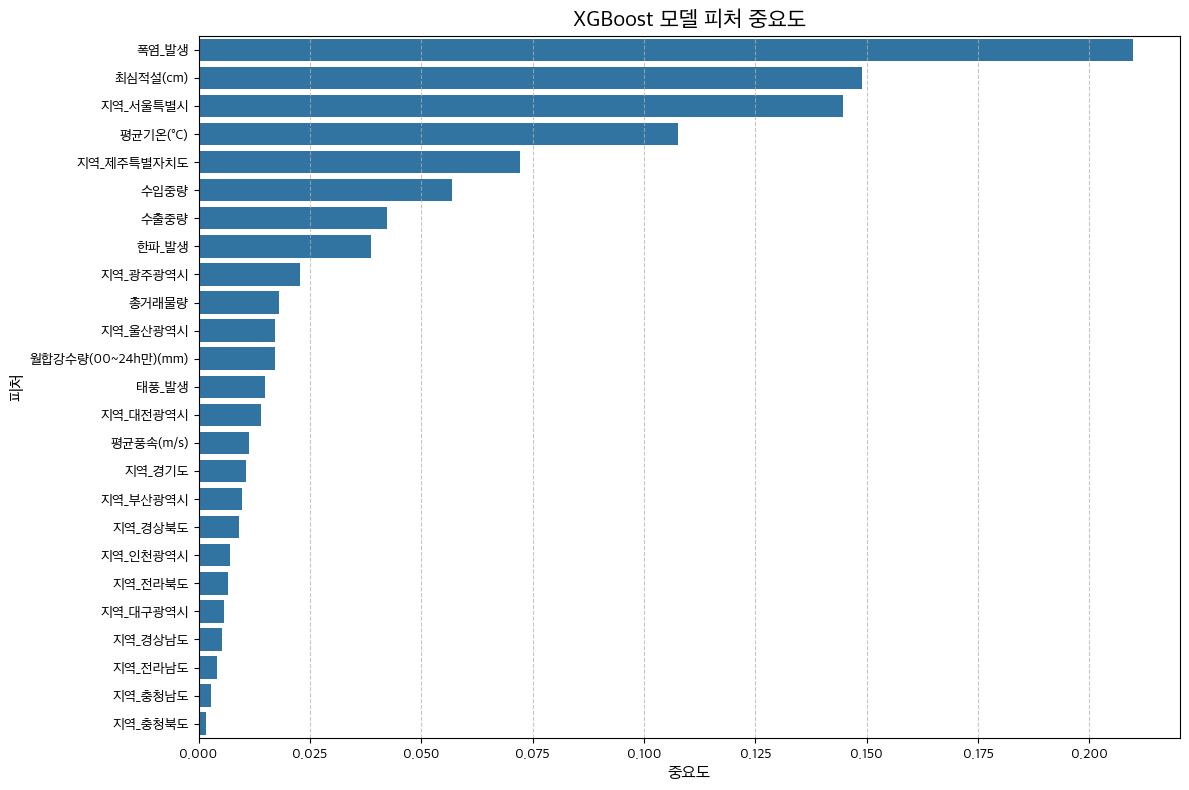

In [141]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_tuned)
plt.title('XGBoost 모델 피처 중요도', fontsize=16)
plt.xlabel('중요도', fontsize=12)
plt.ylabel('피처', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.savefig('feature_importance_barplot.png') # 이미지 파일로 저장
plt.show()

/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:13: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.savefig('actual_vs_predicted_spinach.png') # 이미지 저장
/opt/anaconda3/envs/ml_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


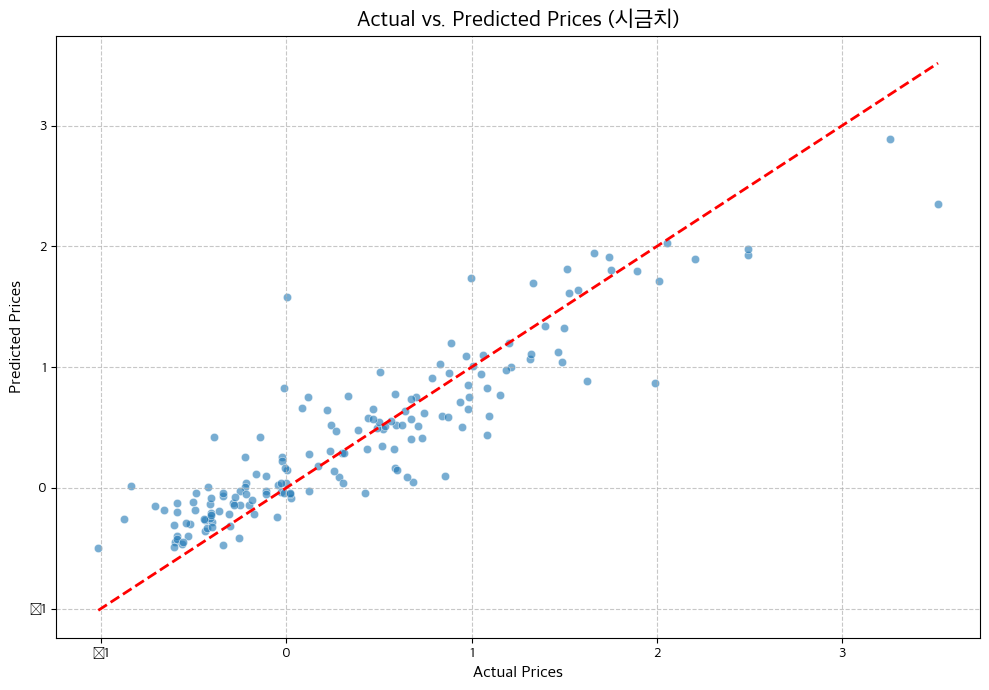

/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.savefig('residuals_histogram_spinach.png') # 이미지 저장
/opt/anaconda3/envs/ml_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


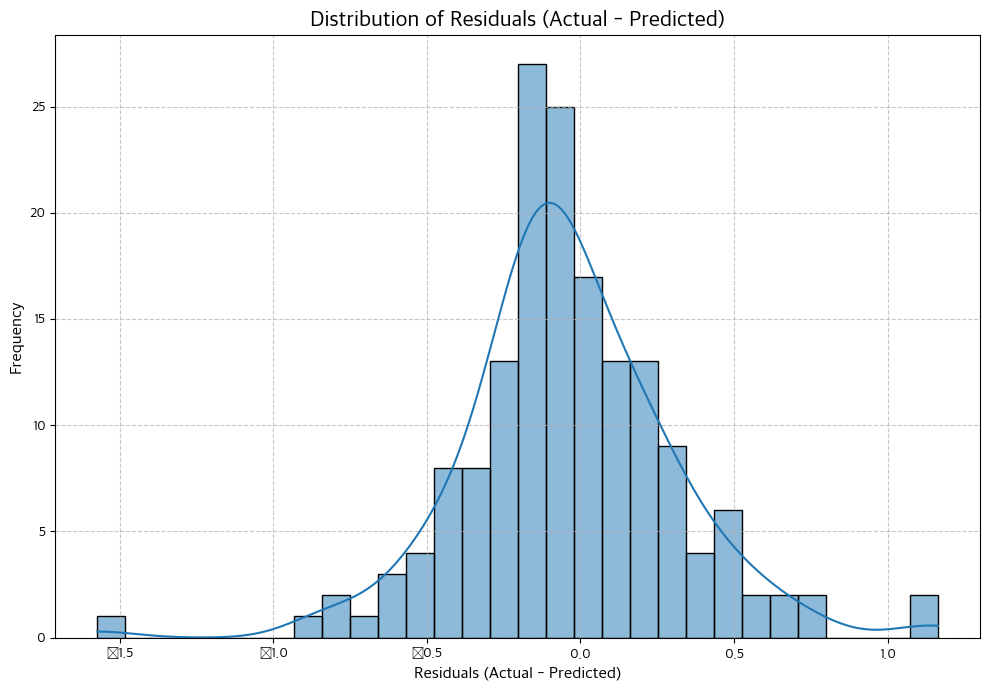

/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:37: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.tight_layout()
/var/folders/l_/jwxy6nr92x313h1886h_krpm0000gn/T/ipykernel_76606/3546935806.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  plt.savefig('residuals_vs_predicted_spinach.png') # 이미지 저장
/opt/anaconda3/envs/ml_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple SD Gothic Neo.
  fig.canvas.print_figure(bytes_io, **kw)


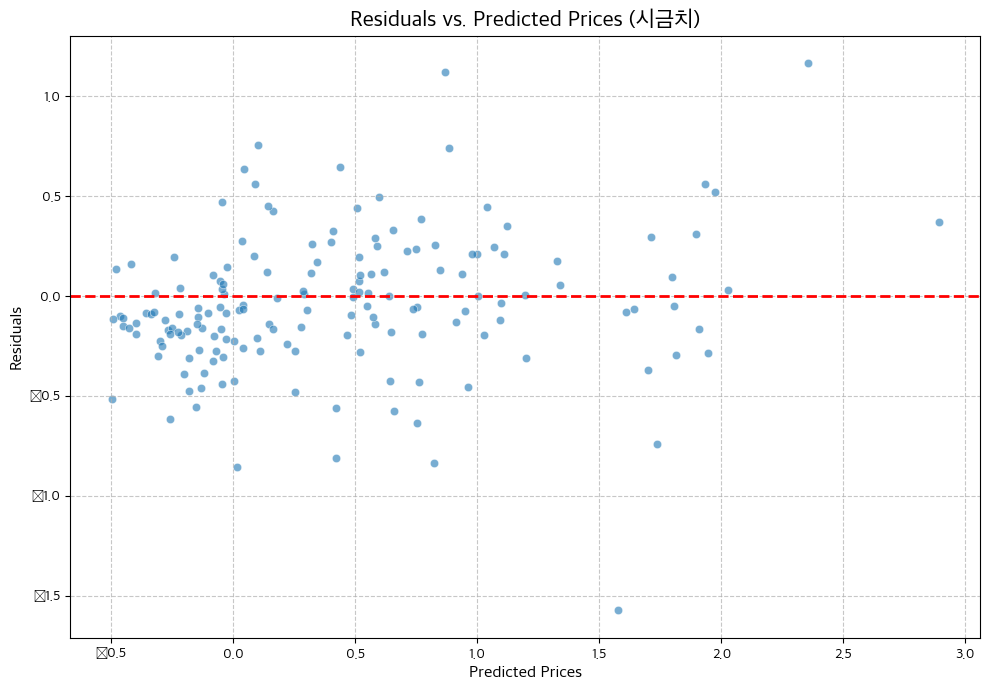

In [142]:
# --- 모델 성능 시각화 ---

# 1. 실제값 vs. 예측값 산점도(Scatter Plot)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
# 완벽한 예측을 나타내는 y=x 선 추가
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Prices (시금치)', fontsize=16)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('actual_vs_predicted_spinach.png') # 이미지 저장
plt.show()

# 2. 잔차(Residual) 히스토그램
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals (Actual - Predicted)', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('residuals_histogram_spinach.png') # 이미지 저장
plt.show()

# 3. 잔차와 예측값의 산점도
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.6)
# 잔차가 0인 이상적인 경우를 나타내는 y=0 선 추가
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Prices (시금치)', fontsize=16)
plt.xlabel('Predicted Prices', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('residuals_vs_predicted_spinach.png') # 이미지 저장
plt.show()